## Example 1: using lyrics
This example was taken from https://www.geeksforgeeks.org/generating-word-cloud-python/

In [1]:
# import necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
in_file = './data/Youtube01-Psy.csv'
#in_file = './data/Youtube02-KatyPerry.csv'
#in_file = './data/Youtube03-LMFAO.csv'
#in_file = './data/Youtube04-Eminem.csv'
#in_fine = './data/Youtube05-Shakira.csv'
df = pd.read_csv(in_file, encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.CONTENT:
     
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

In [3]:
# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

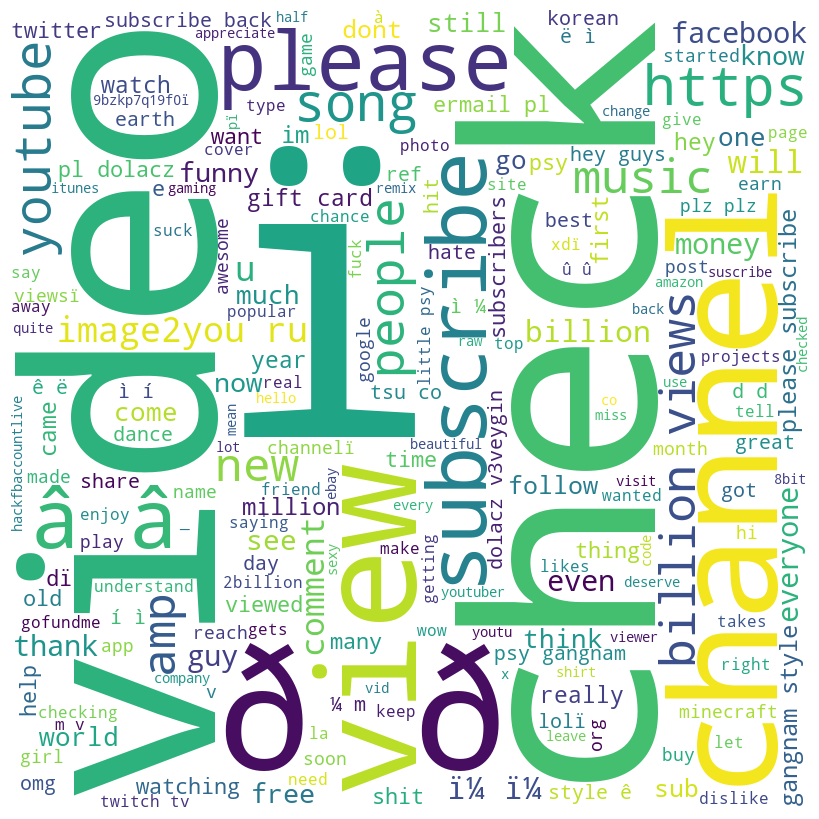

In [4]:
# plot the image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Example 2: Presidential speeches
This example uses the speeches from the 2020 Presidential campaign and was taken from 
https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

We will use a couple of different methods to extract some meaningful words out of the text. We will then generate some word clouds using the Python libraries WordCloud, pandas, and NumPy.

WordCloud is a word cloud generator in Python. You can install WordCloud by one of the following commands.
pip install wordcloud
conda install -c conda-forge wordcloud
Check out installation details [here](https://pypi.org/project/wordcloud/), and you can read through the WordCloud documentation [here](http://amueller.github.io/word_cloud/).

### The Data

The data we will be using is the democratic primary debates for the 2020 presidency. You can find the full dataset here via Kaggle. The data has been cleaned and filtered. The Github repo has the cleaning steps included.

### 1. Import libraries and data

In [5]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# read in the data
#df = pd.read_csv('./data/debate_transcripts_v3_2020-02-26.csv', encoding="cp1252")
df = pd.read_csv('./data/debate_transcripts_v2_2020-02-23.csv', encoding="cp1252")
df.head()

,debate_name,debate_section,speaker,speech,speaking_time_seconds
0,New Hampshire Democratic Debate Transcript,Part 1,George S.,"Candidates, welcome. Vice President Biden, the...",18.0
1,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Oh, they didn’t miss anything. It’s a long rac...",36.0
2,New Hampshire Democratic Debate Transcript,Part 1,George S.,Why are Senator Sanders and Mayor Buttigieg to...,4.0
3,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Well, you know that with regard to Senator San...",41.0
4,New Hampshire Democratic Debate Transcript,Part 1,George S.,"Senator Sanders, let me give you the chance to...",21.0


Before creating a word cloud the text stopwords should be updated specifically to the domain of the text. For example, if we were completing word clouds from customer tweets for an airline company, we would probably get words like ‘plane’, ‘fly’, ‘travel’ and they may not be of any significance to any analysis you are completing.

In this dataset, additional stopwords were included because they appeared a lot in the text but did not contribute to the analysis. For example words like ‘senator’, ‘congressman’, ‘people’, ‘fact’ were all words that were used by many candidates in sentences like ‘I agree with Senator Sanders…’ or ‘The fact is…’, ‘The American people want..’ and did not necessarily contribute to words of meaning for the word cloud.

### Method 1 — Use WordCloud to Process
The simplest and fastest way to create a word cloud is to simply use WordCloud to process the text.

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

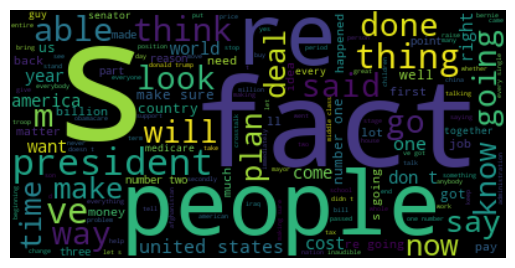

In [7]:
#filter the df to one candidate, and create a list of responses from them
text = df[df.speaker=='Joe Biden'].speech.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off');

In [8]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('s', 412), ('fact', 162), ('people', 115), ('re', 107), ('president', 99)]
[('s', 1.0), ('fact', 0.3932038834951456), ('people', 0.279126213592233), ('re', 0.25970873786407767), ('president', 0.24029126213592233)]


In [9]:
# create a list of candidates
speakers = df.speaker.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df[(df.speaker==candidate)].speech.tolist()) for candidate in speakers]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1, 3))
#cv=CountVectorizer( stop_words=list(STOPWORDS), ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names_out())
bow.index=speakers
print(bow.index)

Index(['George S.', 'Joe Biden', 'Bernie Sanders', 'Amy Klobuchar',
       'Tom Steyer', 'Andrew Yang', 'Elizabeth Warren', 'Pete Buttigieg',
       'Speaker 1', 'Linsey Davis',
       ...
       'Speaker 10', 'Speaker 11', 'Speaker 14', 'Michael Bloomberg',
       'Hallie Jackson', 'Vanessa Hauc', 'Jon Ralston', 'Helen', 'Moderator 4',
       'Audience'],
      dtype='object', length=101)


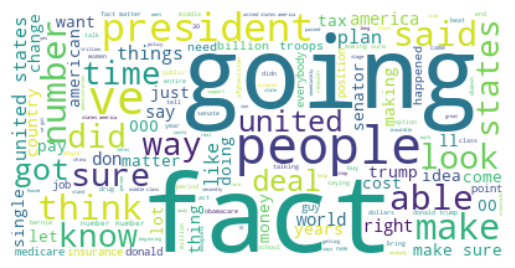

In [10]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['Joe Biden'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['Joe Biden'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [11]:
from tqdm import tqdm #used for progress bar
import math
from collections import Counter

#build an empty dataframe
t_bow_df=pd.DataFrame()

# By candidate, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1) 

for candidate in tqdm(speakers):
    feat_s = bow[bow.index != candidate].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != candidate].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[candidate] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[candidate])]) #append to df

  0%|                                                                                                           | 0/101 [00:00<?, ?it/s]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
  1%|▉                                                                                                  | 1/101 [00:06<10:05,  6.05s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
  2%|█▉                                                                                                 | 2/101 [00:11

 19%|██████████████████▍                                                                               | 19/101 [01:52<08:08,  5.96s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 20%|███████████████████▍                                                                              | 20/101 [01:58<08:03,  5.97s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 21%|████████████████████▍                                                                             | 21/101 [02:04

 38%|████████████████████████████████████▊                                                             | 38/101 [03:44<06:14,  5.94s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 39%|█████████████████████████████████████▊                                                            | 39/101 [03:50<06:07,  5.92s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 40%|██████████████████████████████████████▊                                                           | 40/101 [03:56

 56%|███████████████████████████████████████████████████████▎                                          | 57/101 [05:37<04:21,  5.94s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 57%|████████████████████████████████████████████████████████▎                                         | 58/101 [05:43<04:14,  5.92s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 58%|█████████████████████████████████████████████████████████▏                                        | 59/101 [05:49

 75%|█████████████████████████████████████████████████████████████████████████▋                        | 76/101 [07:30<02:29,  5.96s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 76%|██████████████████████████████████████████████████████████████████████████▋                       | 77/101 [07:36<02:24,  6.03s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 77%|███████████████████████████████████████████████████████████████████████████▋                      | 78/101 [07:42

 94%|████████████████████████████████████████████████████████████████████████████████████████████▏     | 95/101 [09:23<00:35,  5.88s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 95%|█████████████████████████████████████████████████████████████████████████████████████████████▏    | 96/101 [09:29<00:29,  5.86s/it]/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_50078/1657881926.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
 96%|██████████████████████████████████████████████████████████████████████████████████████████████    | 97/101 [09:35

In [12]:
text1_dict = word_freq
text3_dict = text2_dict
# find the most common word frequency from the first dictionary
# and divide by the most common word frequency in the second dictionary
multiplier=((Counter(text1_dict).most_common(1)[0][1]))/Counter(text3_dict).most_common(1)[0][1]

# multiply the value in dictionary 2, by the mutiplier above to make 
# the top value equal to the first dictionary. Use subsequently smaller values of the multiplier 
# to maintain distance between word frequencies
 
text3_dict={k[0]:int(k[1]*v) for k, v in zip(text3_dict.items(),np.linspace(multiplier, 1, 4000) )}

In [13]:
# add the two dictionaries together
full_dict = Counter(text3_dict)+Counter(text1_dict)

# combine 'healthcare' and 'health care' into one key in the dictionary
full_dict['health care'] = full_dict.get('health care', 0) + full_dict.get('healthcare', 0)

In [21]:
# Use an image to mask out the word cloud.  
cand_mask=np.array(Image.open('./images/biden.png'))
# First use the transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Transform the mask into a new one that will work with the function:
transformed_cand_mask = np.ndarray((cand_mask.shape[0],cand_mask.shape[1]), np.int32)

for i in range(len(cand_mask)):
    transformed_cand_mask[i] = list(map(transform_format, cand_mask[i]))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
transformed_cand_mask=np.where(transformed_cand_mask > 3, 255, transformed_cand_mask)

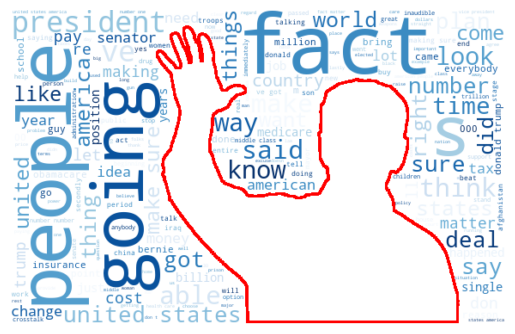

In [27]:
#create and generate our wordcloud object
#wordcloud = WordCloud(font_path = 'font\\GothamMedium.ttf',
wordcloud = WordCloud(background_color='white',
                      contour_color='red',
                      mask=transformed_cand_mask, 
                      colormap='Blues',
                      contour_width=4).generate_from_frequencies(full_dict)


#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

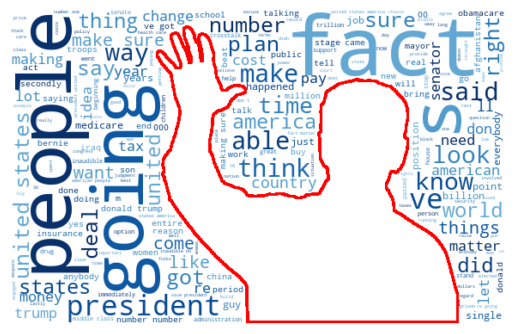

In [28]:
# import the desired colormap from matplotlib
cmap = mpl.cm.Blues(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

#create and generate our wordcloud object
#wordcloud = WordCloud(font_path = 'font\\GothamMedium.ttf',
wordcloud = WordCloud(background_color='white',
                      contour_color='red',
                      max_words=500,
                      mask=transformed_cand_mask, 
                      colormap=cmap, #pass the matrix to the colormap parameter
                      contour_width=4).generate_from_frequencies(full_dict)
#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

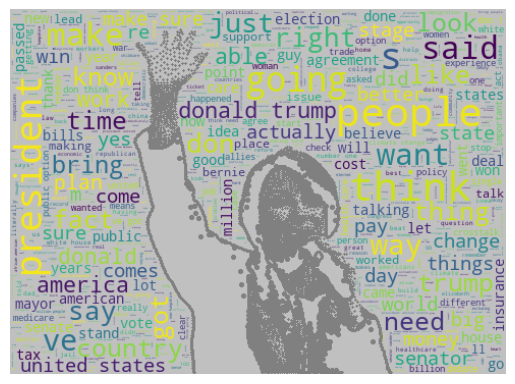

In [31]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['Amy Klobuchar'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['Amy Klobuchar'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

text1_dict = word_freq
text3_dict = text2_dict
# find the most common word frequency from the first dictionary
# and divide by the most common word frequency in the second dictionary
multiplier=((Counter(text1_dict).most_common(1)[0][1]))/Counter(text3_dict).most_common(1)[0][1]

# multiply the value in dictionary 2, by the mutiplier above to make 
# the top value equal to the first dictionary. Use subsequently smaller values of the multiplier 
# to maintain distance between word frequencies
 
text3_dict={k[0]:int(k[1]*v) for k, v in zip(text3_dict.items(),np.linspace(multiplier, 1, 4000) )}

# add the two dictionaries together
full_dict = Counter(text3_dict)+Counter(text1_dict)

# combine 'healthcare' and 'health care' into one key in the dictionary
full_dict['health care'] = full_dict.get('health care', 0) + full_dict.get('healthcare', 0)

# Use an image to mask out the word cloud.  
cand_mask=np.array(Image.open('./images/klobuchar.png'))
# First use the transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Transform the mask into a new one that will work with the function:
transformed_cand_mask = np.ndarray((cand_mask.shape[0],cand_mask.shape[1]), np.int32)

for i in range(len(cand_mask)):
    transformed_cand_mask[i] = list(map(transform_format, cand_mask[i]))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
transformed_cand_mask=np.where(transformed_cand_mask > 3, 255, transformed_cand_mask)

#wordcloud = WordCloud(font_path='font\\GothamMedium.ttf',
wordcloud = WordCloud(mask=transformed_cand_mask,
                      background_color='silver',
                      max_words=2000,
                      min_font_size=2,
                      max_font_size=40,
                      contour_color='grey',
                      contour_width=2).generate_from_frequencies(full_dict)
                      
# use ImageColorGenerator to generate the colors from the image
image_colors = ImageColorGenerator(transformed_cand_mask)

# use the new colors to color the wordcloud
#wordcloud.recolor(color_func = image_colors)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');